In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## コブ=ダグラス生産関数

$$
F(K, L) = A K^\alpha L^{1 - \alpha}
$$

$K \ge 0$ は資本投入量，$L \ge 0$ は労働投入量，$A$ は経済の技術水準，$\alpha$ は資本分配率のパラメータである。

In [2]:
def cobb_douglas(α, A):
    def F(K, L):
        return A * K**α * L**(1-α)
    return F

### パラメータ設定

作図のために以下のパラメータを用いる。
$$
\alpha = 0.3, \qquad A = 1
$$

In [3]:
alpha = 0.3
F = cobb_douglas(α=alpha, A=1)

## プロット

### $(K, L, Y)$ の 3次元プロット

$(K, L)$ 平面に対して高さ $Y=F(K,L)$ をプロットする3次元のグラフを描く。この図からは，$K$, $L$ が大きいときに $Y$ が大きくなる，ということくらいしか分からないかもしれない。

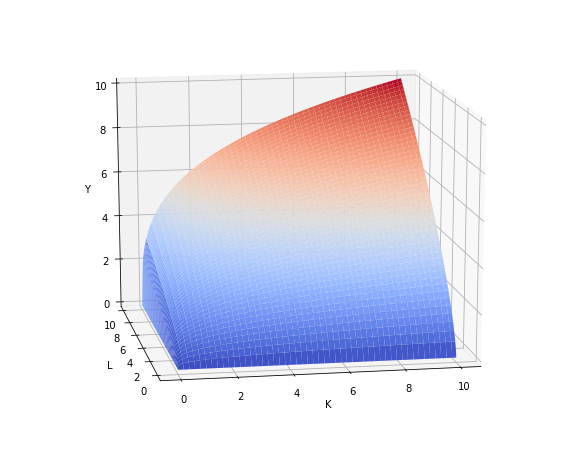

In [4]:
k = np.linspace(0, 10, 200)
l = np.linspace(0, 10, 200)
K, L = np.meshgrid(k, l)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=15., azim=260)

ax.plot_surface(K, L, F(K, L), cmap=cm.coolwarm)
ax.set_xlabel('K')
ax.set_ylabel('L')
ax.set_zlabel('Y');

### 労働の限界生産力 : $K$ を固定する

$K = 1, 3$ に固定する。重ねて描いた曲線（オレンジ，緑）は，$L$ の増加に伴って（グラフの右側に行くとともに），接線の傾きが徐々に小さくなっていくことに注意する。これは，**労働の限界生産力逓減**を表している。 

労働の限界生産力 (Marginal Product of Labor, MPL) は次のように偏微分で定義される。

$$
\mathrm{MPL} = \frac{\partial F}{\partial L} = (1 - \alpha) AK^\alpha L^{-\alpha}
$$

偏微分は他の変数を固定したときの微分であることを思い出そう。荒く言えば，資本投入量を固定したまま労働投入量を1単位増やしたときに追加的に産出される生産物の量である。MPL が $L$ の増加とともに小さくなっていくことを，労働の限界生産力逓減と呼んでいる。背後にある数学的な特徴を確かめるためには，もう一度偏微分すればよい。

$$
\frac{\partial \mathrm{MPL}}{\partial L} = -\alpha(1-\alpha) AK^\alpha L^{-\alpha-1} < 0
$$

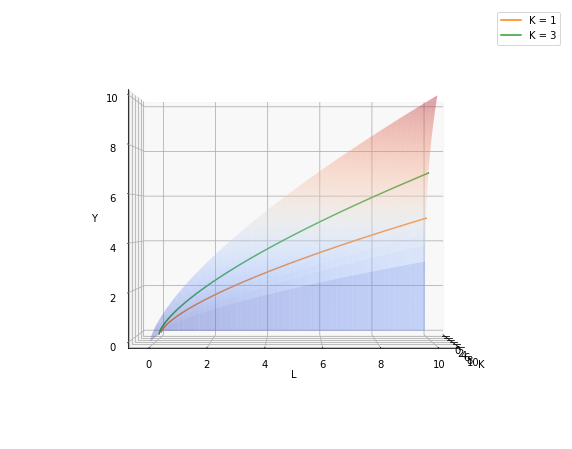

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0., azim=0)

ax.plot_surface(K, L, F(K, L), 
                cmap=cm.coolwarm, alpha=0.4)

k_1 = np.ones_like(k)
k_3 = np.ones_like(k) * 3

ax.plot(k_1, l, F(k_1, l), label='K = 1')
ax.plot(k_3, l, F(k_3, l), label='K = 3')

ax.legend()
ax.set_xlabel('K')
ax.set_ylabel('L')
ax.set_zlabel('Y');

### 資本の限界生産力 : $L$ を固定する

$L = 1, 3$ に固定する。重ねて描いた曲線（オレンジ，緑）は，$K$ の増加に伴って（グラフの右側に行くとともに），接線の傾きが徐々に小さくなっていくことに注意する。これは，**資本の限界生産力逓減**を表している。 

資本の限界生産力 (Marginal Product of Capital, MPK) は次のように偏微分で定義される。

$$
\mathrm{MPK} = \frac{\partial F}{\partial K} = \alpha AK^{\alpha-1} L^{1-\alpha}
$$

偏微分は他の変数を固定したときの微分であることを思い出そう。荒く言えば，労働投入量を固定したまま資本投入量を1単位増やしたときに追加的に産出される生産物の量である。MPK が $K$ の増加とともに小さくなっていくことを，資本の限界生産力逓減と呼んでいる。背後にある数学的な特徴を確かめるためには，もう一度偏微分すればよい。

$$
\frac{\partial \mathrm{MPK}}{\partial K} = -\alpha(1-\alpha) AK^{\alpha-2} L^{1-\alpha-1} < 0
$$

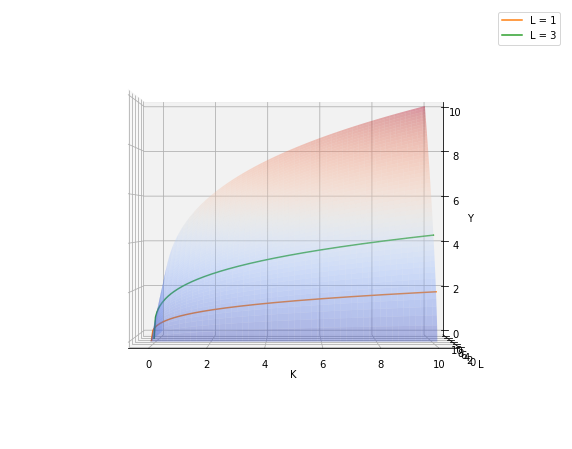

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0., azim=270)

ax.plot_surface(K, L, F(K, L), 
                cmap=cm.coolwarm, alpha=0.4)

l_1 = np.ones_like(l)
l_3 = np.ones_like(l) * 3

ax.plot(k, l_1, F(k, l_1), label='L = 1')
ax.plot(k, l_3, F(k, l_3), label='L = 3')

ax.legend()
ax.set_xlabel('K')
ax.set_ylabel('L')
ax.set_zlabel('Y');

### 収穫一定 : $K/L$ を固定する

コブ=ダグラス生産関数は「**規模に関する収穫一定**」という性質を持っている。これは**1次同次性**とも呼ばれる。次のように定義される。

$$
F(zK, zL) = z F(K, L),\qquad \text{for all }\quad z > 0
$$

確かめてみよう。

$$
A(zK)^\alpha (zL)^{1-\alpha} 
= z^\alpha z^{1-\alpha} AK^\alpha L^{1-\alpha}
= z^{\alpha + 1- \alpha} AK^{\alpha} L^{1-\alpha}
= z AK^{\alpha} L^{1-\alpha}
$$

#### 作図の方針

ある $\bar{K}, \bar{L}$ に対して　$K = z\bar{K}$, $L = z\bar{L}$ ($z \ge 0$) と表現できる $K, L$ は $(K, L)$-平面上の原点を通る直線となる。（下図）

![](CobbDouglas-image.png)

したがって，

$$
K / L = \bar{K} / \bar{L} = c
$$

なる $(K, L)$ に対して $F(K,L)$ を計算してプロットすればよい。

このように特別に選んだ $(K, L)$ に対しては

$$
F(K, L) = F(z\bar{K}, z\bar{L}) = z F(\bar{K}, \bar{L}) 
$$

であり，$z$ について比例関係にが得られる。したがって，原点を通る直線が描かれるはずである。実際に下図のオレンジ・緑・赤の線は直線になっている。これらの直線が最初に描いた曲面上に描かれているというのがポイントである。
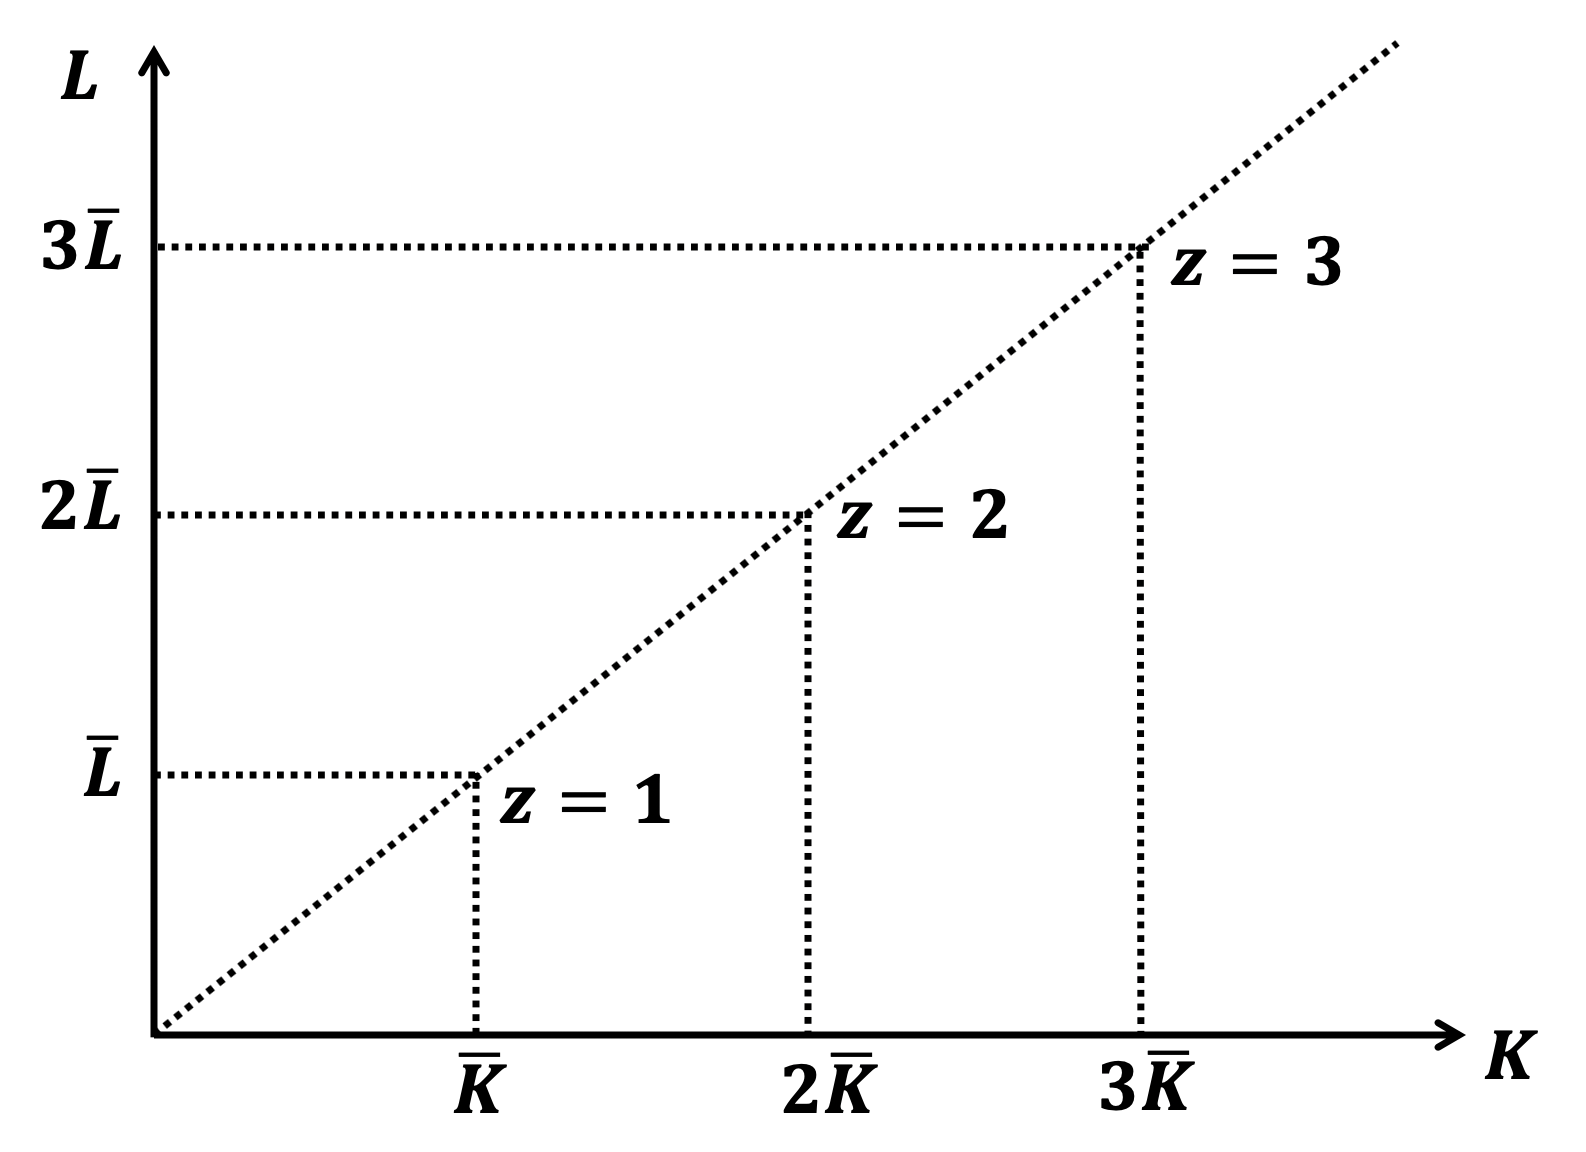

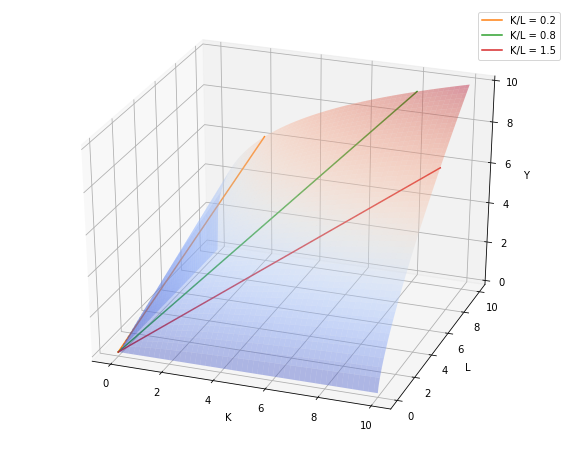

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30., azim=290)

ax.plot_surface(K, L, F(K, L), 
                cmap=cm.coolwarm, alpha=0.4)

k_1 = l * 0.2
k_2 = l * 0.8
l_3 = k / 1.5

ax.plot(k_1, l, F(k_1, l), label='K/L = 0.2')
ax.plot(k_2, l, F(k_2, l), label='K/L = 0.8')
ax.plot(k, l_3, F(k, l_3), label='K/L = 1.5')

ax.legend()
ax.set_xlabel('K')
ax.set_ylabel('L')
ax.set_zlabel('Y');

## 分配率

要素市場が競争的であれば，生産要素はその限界生産力の価値を稼ぐ。資本が受け取る総所得は $\mathrm{MPK} \times K$ であり，労働が受け取る総所得は $\mathrm{MPL} \times L$ である。これは，企業が利潤最大化問題

$$
\max_{K, L} [F(K, L) - r K - wL]
$$

を解いているという想定に基づいている。$r$ は実質資本レンタル率，$w$ は実質賃金であり，競争的な企業はこれを所与として最大化問題を解く。最適化問題の解は $r = \mathrm{MPK}$, $w = \mathrm{MPL}$ を満たす。

総生産に占めるこれらの要素所得の割合を，それぞれ資本分配率 (capital share)，労働分配率 (labor share)と呼ぶ。

$$
\begin{aligned}
\text{Capital Share} &= \frac{\mathrm{MPK} \times K}{Y}\\
\text{Capital Share} &= \frac{\mathrm{MPL} \times L}{Y}
\end{aligned}
$$

コブ=ダグラス型の場合，

$$
\begin{aligned}
\text{Capital Share} 
&= \frac{\mathrm{MPK} \times K}{Y}\\
&= \frac{\alpha AK^{\alpha-1} L^{1-\alpha} \times K}{Y}\\
&= \frac{\alpha AK^{\alpha} L^{1-\alpha}}{Y}\\
&= \alpha &  (\because Y = AK^{\alpha}L^{1-\alpha})
\end{aligned}
$$

$$
\begin{aligned}
\text{Labor Share} 
&= \frac{\mathrm{MPL} \times L}{Y}\\
&= \frac{(1-\alpha) AK^{\alpha} L^{-\alpha}\times L}{Y}\\
&= \frac{(1-\alpha) AK^{\alpha} L^{1-\alpha}}{Y}\\
&= 1-\alpha &  (\because Y = AK^{\alpha}L^{1-\alpha})
\end{aligned}
$$



「ゼロ利潤」を表す方程式 $Y = \mathrm{MPK} \times K + \mathrm{MPL} \times L$ を少し変形して，

$$
\frac{K}{Y / \mathrm{MPK}} + \frac{L}{Y/ \mathrm{MPL}} = 1
$$

と表せば，$(K, L)$ に関する，予算制約線のようなものを描くことができる。MPK, MPL を固定したまま $Y$ を増やすと，直線は傾きを変えずに右上に動いていく。下図の緑破線は3つの $Y$ の水準について，ゼロ利潤条件（予算制約線のようなもの）を表している。

生産が最適に行われている状態では，等量曲線（下図の等高線）が先のゼロ利潤線と接している。緑実線が緑破線が接している点を見てほしい。

ここで注目するべきは，これらの接点を結ぶと原点を通る直線（黄破線）になっていることである。このような直線を引けるということは，$Y$ の上昇と同じ率で $K$ や $L$ が増加するということである。$r = \mathrm{MPK}$, $w = \mathrm{MPL}$ は所与で一定としているのだから，総生産量によらずに労働分配率，資本分配率が一定にならなければならない。

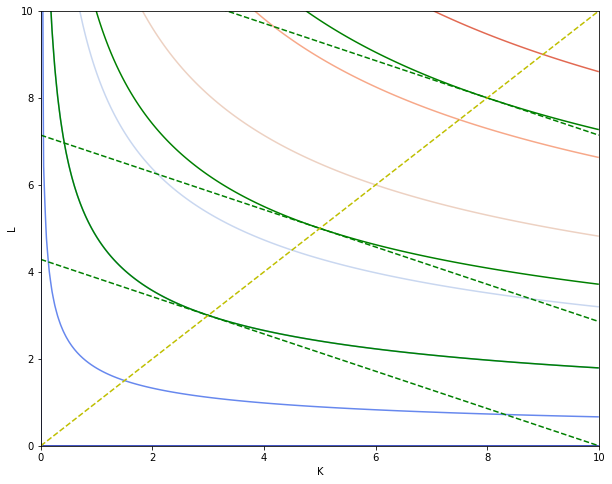

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

Y = [3.0, 5.0, 8.0]
MPK, MPL = 0.3, 0.7

ax.contour(K, L, F(K, L), cmap=cm.coolwarm)
ax.contour(K, L, F(K, L), levels=Y, colors='green')

l0 = (Y[0] - MPK * k) / MPL
l1 = (Y[1] - MPK * k) / MPL
l2 = (Y[2] - MPK * k) / MPL
le = MPK * (1 - alpha) / alpha / MPL * k

ax.plot(k, l0, 'g--')
ax.plot(k, l1, 'g--')
ax.plot(k, l2, 'g--')
ax.plot(k, le, 'y--')

ax.set_xlabel('K')
ax.set_ylabel('L')
ax.set_ylim(0, 10);